In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')  #样式美化
from sklearn.metrics import classification_report  #这个包是评价报告

In [85]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [86]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


E:\develop\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\develop\anaconda\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


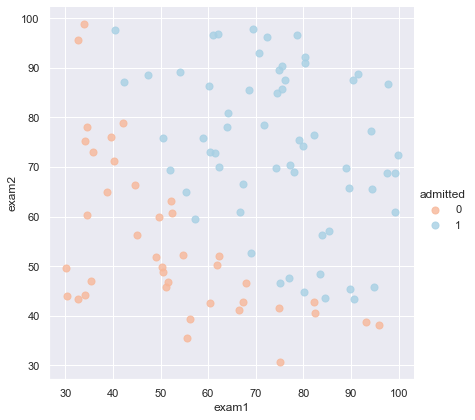

In [87]:
sns.set(context='notebook', style='darkgrid', palette=sns.color_palette('RdBu', 2))  # 设置样式参数，默认主题darkgrid(灰色背景+白网格)
sns.lmplot('exam1', 'exam2', hue='admitted', data=data,
           size=6,
           fit_reg=False,  # fit_reg参数，控制是否拟合的直线
           scatter_kws={"s": 50})  # hue参数是将name所指定的不同类型的数据叠加在一张图中显示
plt.show()  # 看下数据的样子

In [88]:
def get_X(df):  # 读取特征
    ones = pd.DataFrame({'ones': np.ones(len(df))})  # ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  #合并数据，根据列合并axis=1的时候，concat就是行对齐，然后将不同列名称的两张表合并加列
    return data.iloc[:, :-1].values  #这个操作返回ndarray，不是矩阵    # as_matrix()已经被淘汰


def get_y(df):  #读取标签
    return np.array(df.iloc[:, -1])  #df.iloc[:,-1]指的是df的最后一列


def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())  #特征缩放在逻辑回归中同样使用

In [89]:
X = get_X(data)
print(X.shape)
y = get_y(data)
print(y.shape)

(100, 3)
(100,)


---
sigmoid函数

In [90]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

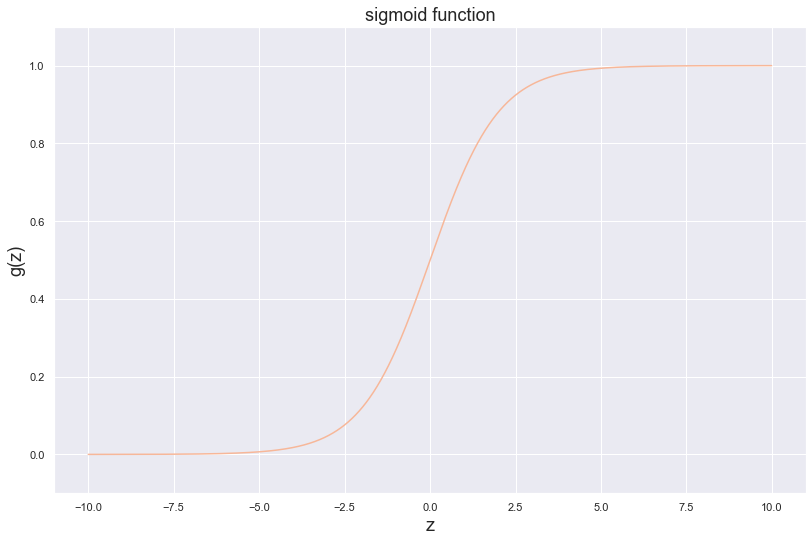

In [91]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(-10, 10, step=0.01), sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1, 1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

---

cost function(代价函数)

In [92]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

In [93]:
def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [94]:
cost(theta, X, y)

0.6931471805599453

---

gradient descent(梯度下降)

In [95]:
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [96]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

---

拟合参数

In [97]:
import scipy.optimize as opt

In [98]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

In [99]:
print(res)

     fun: 0.20349770531788094
     jac: array([3.00986046e-06, 1.33871832e-06, 1.86577910e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 198
  status: 0
 success: True
       x: array([-25.15632676,   0.20619166,   0.20143109])


---

用训练集预测和验证

In [100]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [101]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



---

寻找决策边界

In [102]:
print(res.x)

[-25.15632676   0.20619166   0.20143109]


In [104]:
coef = -(res.x / res.x[2])
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1] * x

[124.88800477  -1.02363377  -1.        ]


In [105]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


E:\develop\anaconda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\develop\anaconda\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


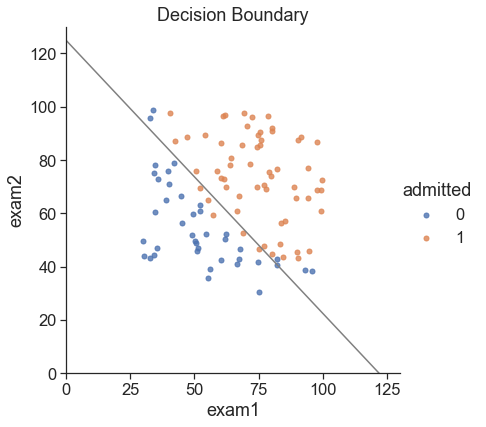

In [106]:
sns.set(context='notebook', style='ticks', font_scale=1.5)  #默认使用notebook上下文，主题context可以设置输出图片的大小尺寸(scale)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data,
           size=6,
           fit_reg=False,
           scatter_kws={'s': 25}
           )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()